Importing Required Libraries

In [20]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import math


Downloading the Dataset
This cell downloads the dataset from Kaggle using the `kagglehub`

In [2]:
# Download the dataset from Kaggle
data_path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")
df_csv = os.path.join(data_path, "train.csv")

In [3]:
df = pd.read_csv(df_csv)

Checking Dataset Shape

In [4]:
print(df.shape)

(2000, 21)


Previewing the Dataset

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Checking Dataset Information
This cell provides a summary of the dataset, including column data types, non-null counts, and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Checking for Null Values

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Checking for Duplicate Rows

In [8]:
df.duplicated().sum()


0

Summary of Null and Duplicate Checks : 
The dataset has no missing or duplicate values, ensuring data quality for further analysis.

This cell calculates the distribution of the `price_range` column to understand the balance of classes in the dataset.
we can see that the data is well distributed

In [9]:
df['price_range'].value_counts()


price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Dataset Statistics
This cell provides descriptive statistics for all numerical columns in the dataset, including mean, standard deviation, and range.

In [10]:
df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Sampling High Price Range Data
This cell selects a random sample from the dataset where the price range is high (3) to inspect its features.

In [11]:
df[df['price_range'] == 3].sample(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1431,1283,1,0.7,1,0,1,27,0.2,80,4,...,1135,1923,3957,17,15,6,1,0,0,3


Sampling Low Price Range Data
This cell selects a random sample from the dataset where the price range is low (0) to inspect its features.

In [12]:
df[df['price_range'] == 0].sample(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
917,904,0,1.8,0,3,1,35,0.4,168,3,...,42,507,1360,15,12,11,1,0,0,0


# Visualizing Feature Distributions
This cell generates histograms for all features in the dataset to visualize their distributions and identify potential outliers.

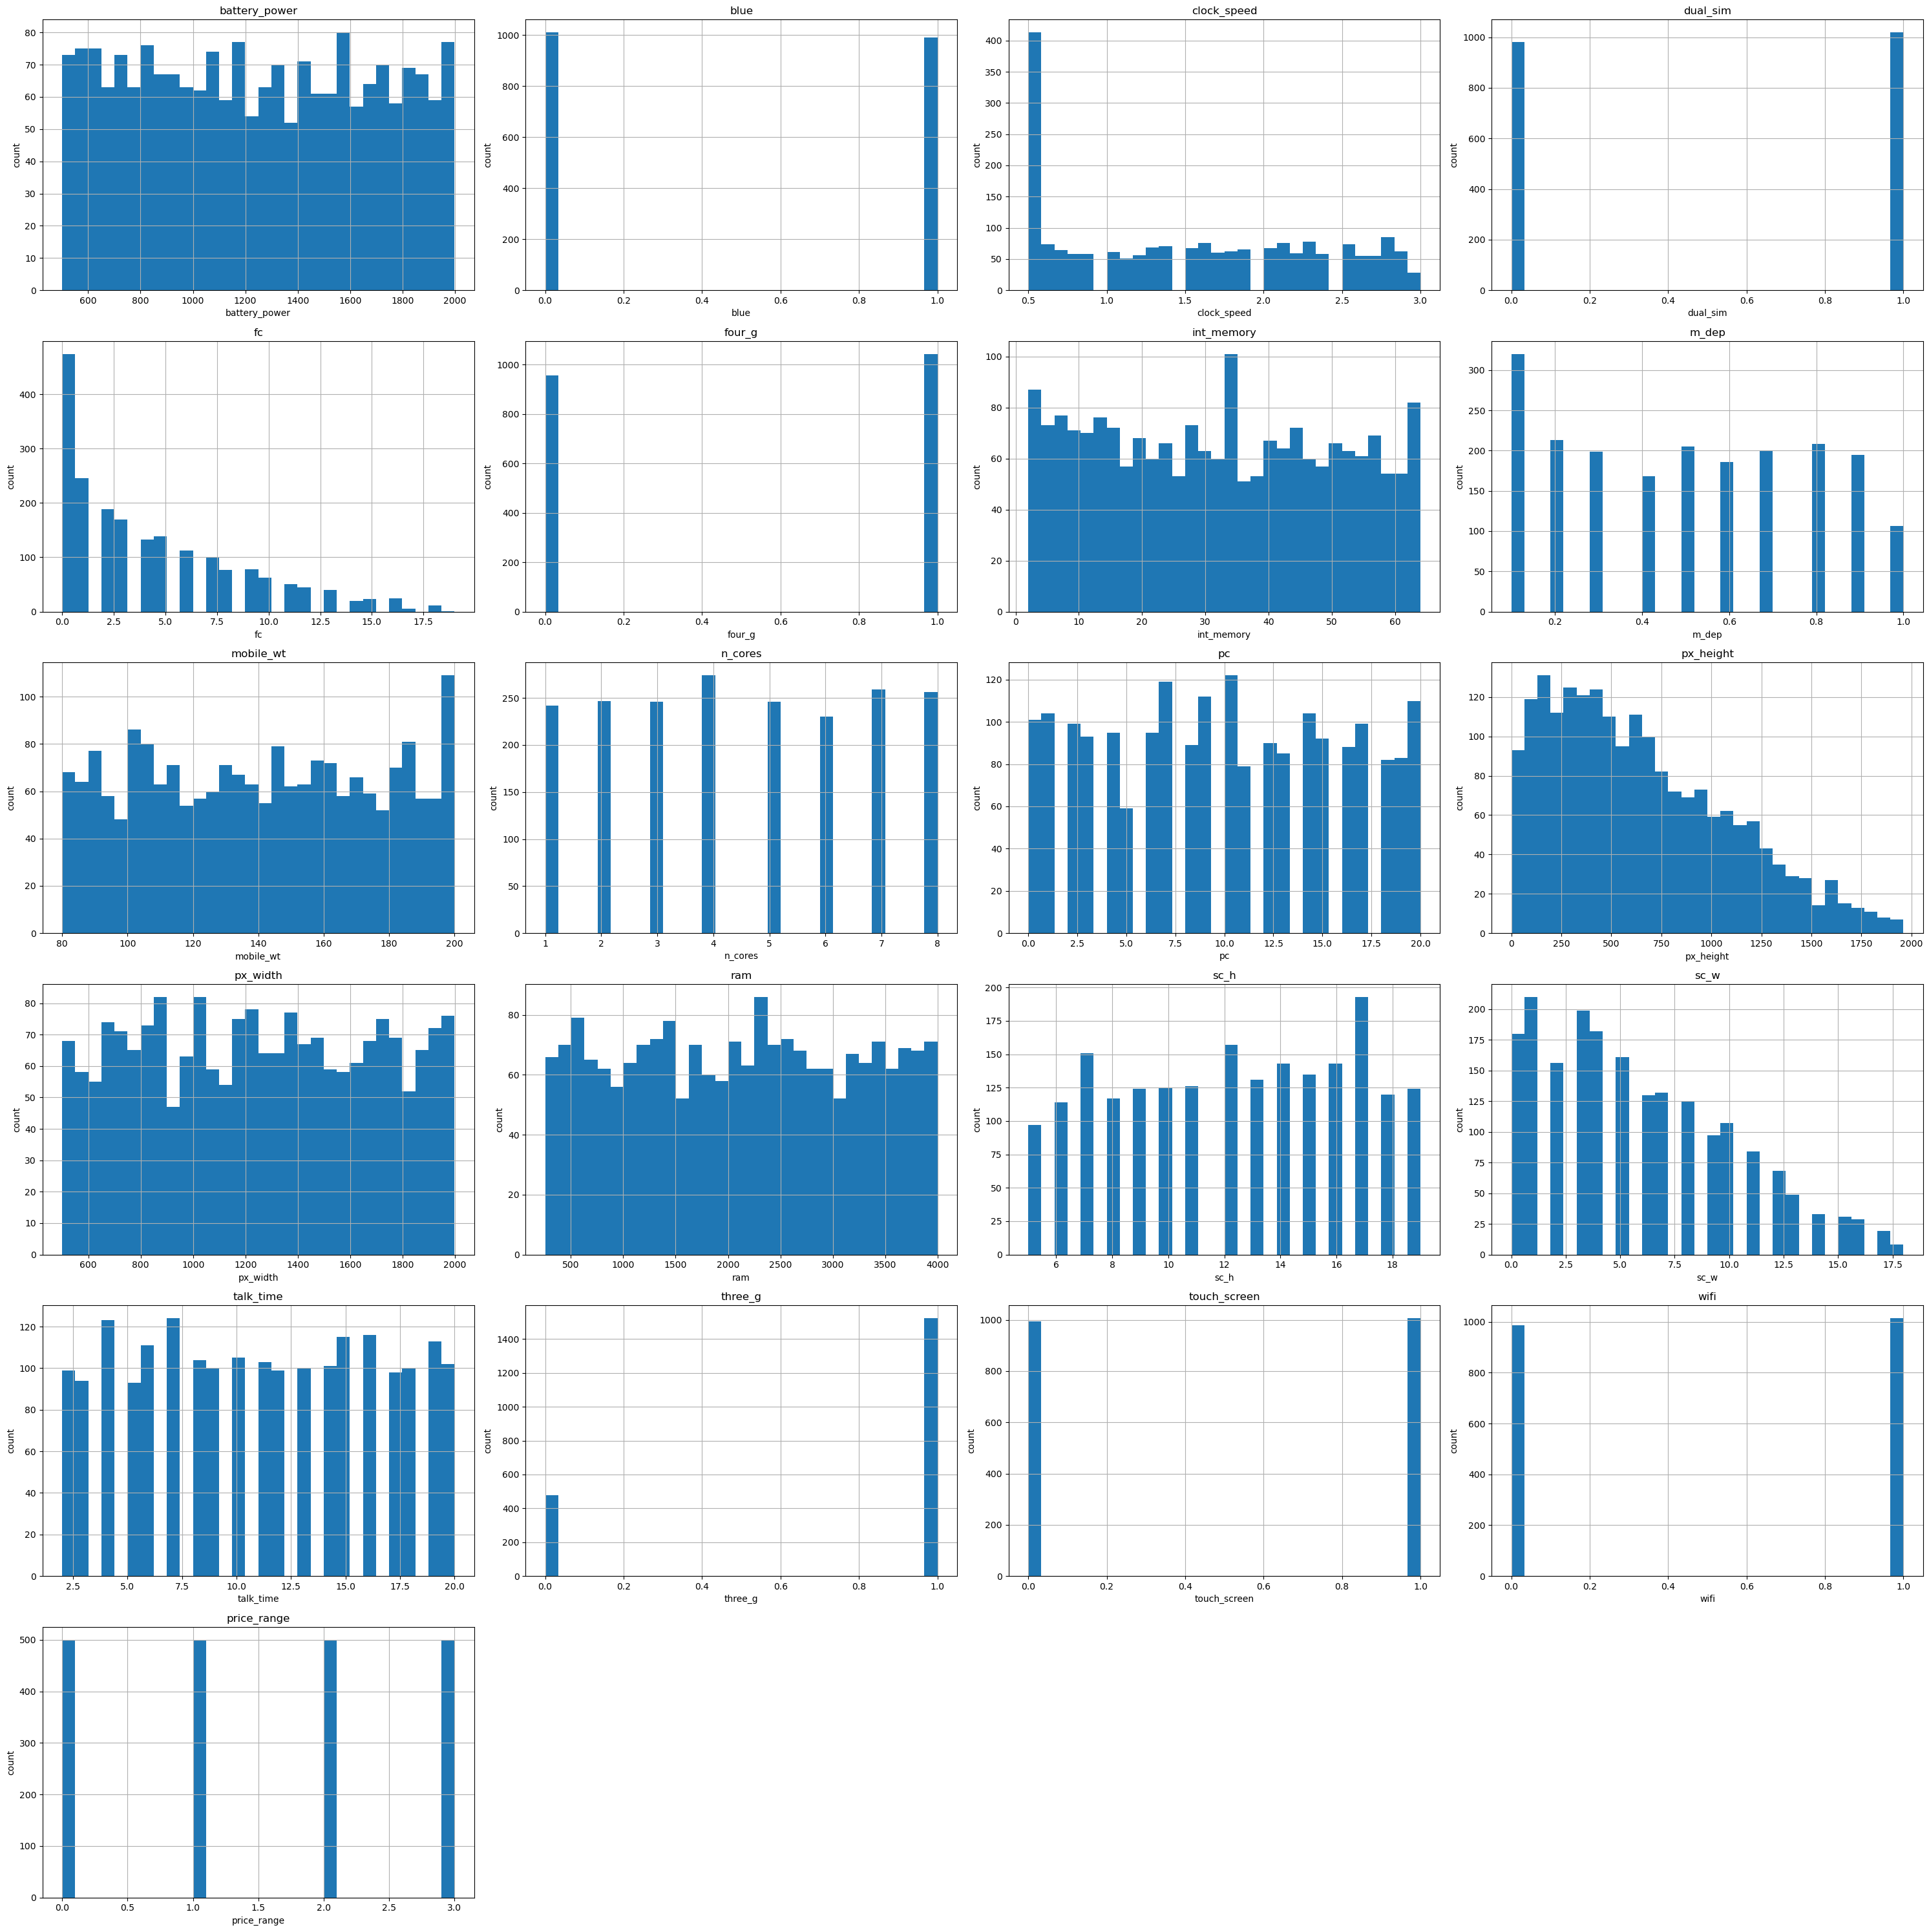

In [13]:
cols = df.columns
num_cols = len(cols)
n_rows = 6  # You can change this to 3 for more rows
n_cols = math.ceil(num_cols / n_rows)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 30))

axes = axes.flatten()  # Flatten in case of multiple rows

for idx, col in enumerate(cols):
    df[col].hist(bins=30, ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('count')

# Hide any unused subplots
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Feature Types Analysis
The dataset contains a mix of binary features (values are either 0 or 1) and continuous features (values are in a range, represented as floats). This distinction is important for understanding the data and selecting appropriate preprocessing techniques.

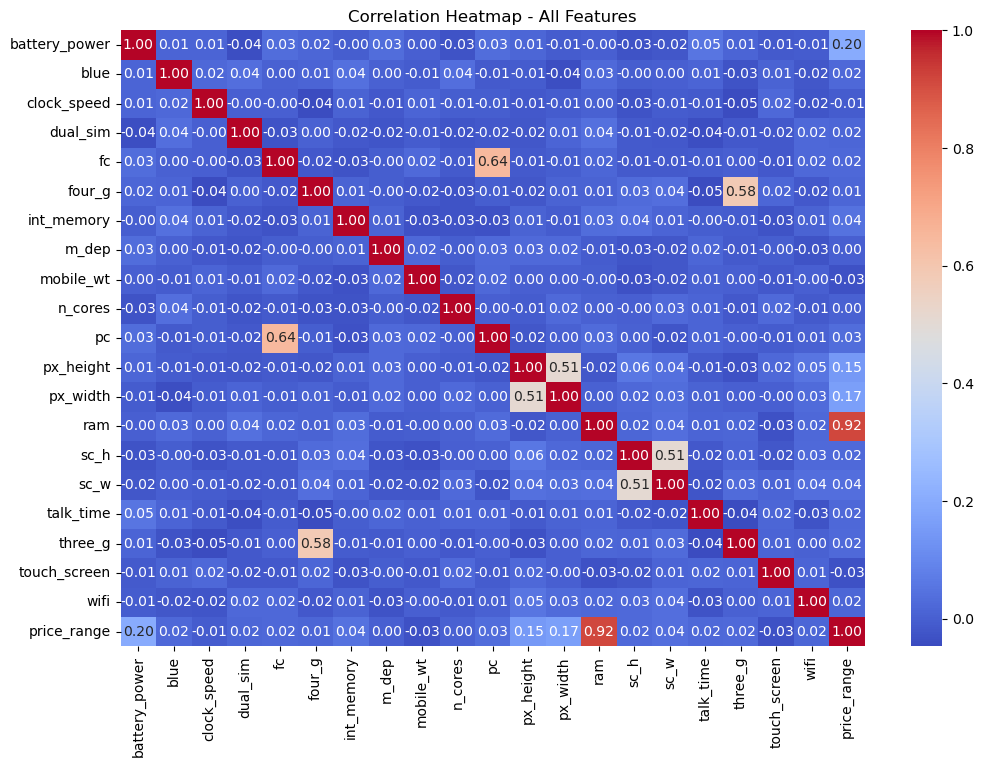

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap - All Features")
plt.show()

# Correlation Heatmap
This cell generates a heatmap to visualize the correlation between features, helping to identify highly correlated variables.

we can see high corlition between ram and price , and corlation between sc_h sc_w , corlation three g and four g , pc and fc , From correlation analysis, ram have high coorelation. sc_h and sc_w have coorelation and it is better to create new variable sc_size by multiplying both. px_height,px_width have correlation and it is better to create new variable sc_area by multiplying both. Camera specifications(fc and pc) have coorelation so it is better to drop one and keep another. three_g and four_g have high correlation, but we want to keep both.

# Feature Engineering
This cell creates new features such as `screen_size` and `screen_area` by combining existing features. It also removes redundant columns to simplify the dataset.

In [15]:
df['screen_size'] = df['sc_h'] * df['sc_w']
df['screen_area'] = df['px_height'] * df['px_width']

df.drop(['sc_h', 'sc_w', 'px_height', 'px_width', 'pc'], axis=1, inplace=True)
df.shape

(2000, 18)

# Separating Features and Target
This cell separates the dataset into features (`X`) and the target variable (`y`) for model training.

In [16]:
X=df.drop('price_range', axis=1)
y=df['price_range']

# PCA Visualization
This cell applies Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and visualizes the data in 2D space.

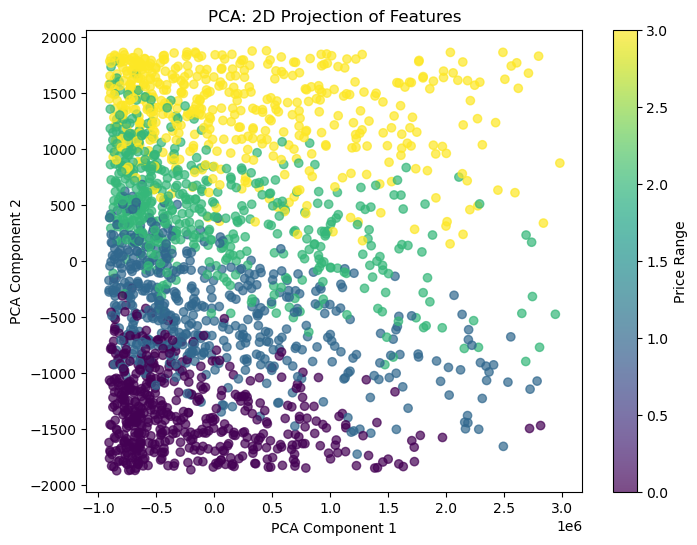

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA: 2D Projection of Features')
plt.colorbar(scatter, label='Price Range')
plt.show()

# PCA Visualization Insights
The PCA plot shows that the data points are generally separable into distinct groups based on the price range. However, there are overlapping areas where the groups mix, indicating that some features may not fully differentiate the classes. This overlap suggests potential challenges in achieving perfect classification.

# Splitting the Dataset
This cell splits the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600, 17) (400, 17) (1600,) (400,)


# Model Initialization and Hyperparameter Setup
This cell initializes various machine learning models and defines their respective hyperparameter grids for tuning. These models will be evaluated to determine the best-performing one for the dataset.

In [21]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg_params = {"C": [0.01, 0.1, 1, 10], "solver": ["lbfgs", "liblinear"]}

# KNN
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": [3,5,7,9], "weights": ["uniform", "distance"]}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [100, 200],
             "max_depth": [None, 10, 20],
             "min_samples_split": [2, 5]}

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_params = {"n_estimators": [100, 200],
              "max_depth": [3, 6],
              "learning_rate": [0.01, 0.1]}

# SVM
svm = LinearSVC(random_state=42, max_iter=2000)
svm_params = {"C": [0.1, 1, 10]}

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_params = {"n_estimators": [100, 200],
             "learning_rate": [0.01, 0.1],
             "max_depth": [3, 5]}

# LightGBM
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_params = {"n_estimators": [100, 200],
              "learning_rate": [0.01, 0.1],
              "num_leaves": [31, 50]}

# CatBoost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=0, random_state=42)
cat_params = {"iterations": [100, 200],
              "depth": [4, 6],
              "learning_rate": [0.01, 0.1]}

# Extra Trees
et = ExtraTreesClassifier(random_state=42)
et_params = {"n_estimators": [100, 200],
             "max_depth": [None, 10, 20],
             "min_samples_split": [2, 5]}

# Naive Bayes
nb = GaussianNB()
nb_params = {}  # usually no tuning needed



# ✅ Combine all models
models = {
    "Logistic Regression": (log_reg, log_reg_params, X_train, X_test),
    "KNN": (knn, knn_params, X_train, X_test),
    "Random Forest": (rf, rf_params, X_train, X_test),
    "XGBoost": (xgb_clf, xgb_params, X_train, X_test),
    "SVM": (svm, svm_params, X_train, X_test),
    "Gradient Boosting": (gb, gb_params, X_train, X_test),
    "LightGBM": (lgb_clf, lgb_params, X_train, X_test),
    "CatBoost": (cat, cat_params, X_train, X_test),
    "Extra Trees": (et, et_params, X_train, X_test),
    "Naive Bayes": (nb, nb_params, X_train, X_test),
}

# Model Training and Evaluation
This cell trains each model using GridSearchCV to find the best hyperparameters. It evaluates the models on the test set and calculates metrics such as accuracy and confusion matrices.

Training Logistic Regression ...


c:\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Logistic Regression Accuracy: 0.6425
Best Params: {'C': 1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.55      0.36      0.44        91
           2       0.45      0.43      0.44        92
           3       0.66      0.85      0.74       112

    accuracy                           0.64       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.63      0.64      0.63       400



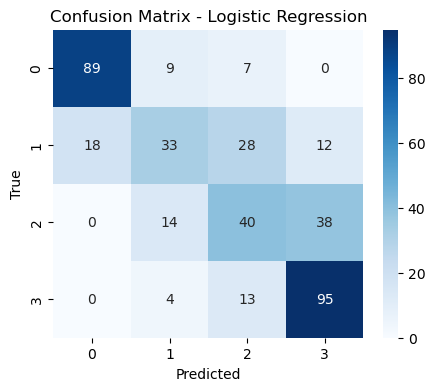

------------------------------------------------------------
Training KNN ...
KNN Accuracy: 0.3950
Best Params: {'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       105
           1       0.29      0.35      0.32        91
           2       0.31      0.39      0.34        92
           3       0.48      0.34      0.40       112

    accuracy                           0.40       400
   macro avg       0.41      0.39      0.40       400
weighted avg       0.42      0.40      0.40       400

KNN Accuracy: 0.3950
Best Params: {'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       105
           1       0.29      0.35      0.32        91
           2       0.31      0.39      0.34        92
           3       0.48      0.34      0.40       112

    accuracy                           0.40       400
   macro 

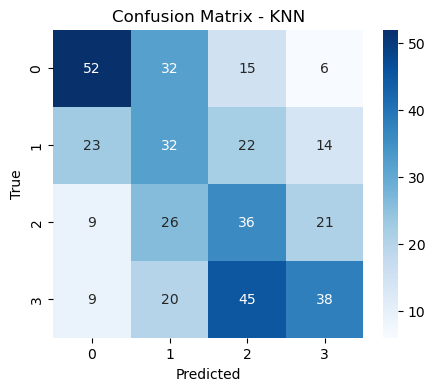

------------------------------------------------------------
Training Random Forest ...
Random Forest Accuracy: 0.8825
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.88      0.82      0.85        91
           2       0.77      0.88      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400

Random Forest Accuracy: 0.8825
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.88      0.82      0.85        91
           2       0.77      0.88      0.82        92
           3       0.94      0.87      0.9

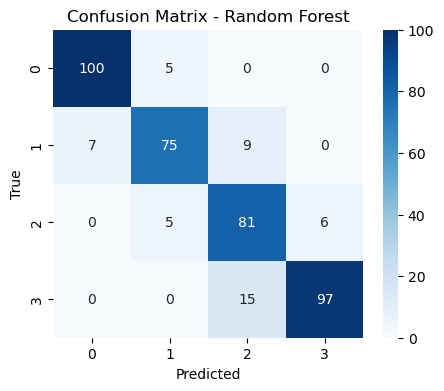

------------------------------------------------------------
Training XGBoost ...


c:\ana\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:41:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8900
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       105
           1       0.83      0.91      0.87        91
           2       0.82      0.85      0.83        92
           3       0.95      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



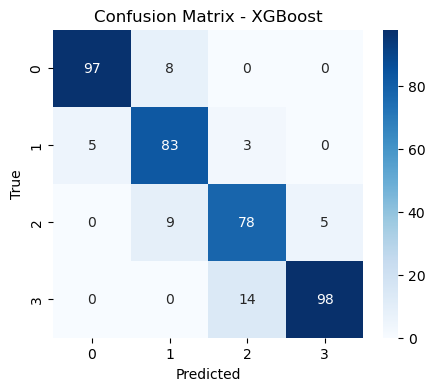

------------------------------------------------------------
Training SVM ...
SVM Accuracy: 0.6225
Best Params: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.47      0.25      0.33        91
           2       0.45      0.42      0.44        92
           3       0.64      0.88      0.74       112

    accuracy                           0.62       400
   macro avg       0.59      0.60      0.58       400
weighted avg       0.60      0.62      0.60       400

SVM Accuracy: 0.6225
Best Params: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.47      0.25      0.33        91
           2       0.45      0.42      0.44        92
           3       0.64      0.88      0.74       112

    accuracy                           0.62       400
   macro avg       0.59      0.60      0.58       400
weighted avg     

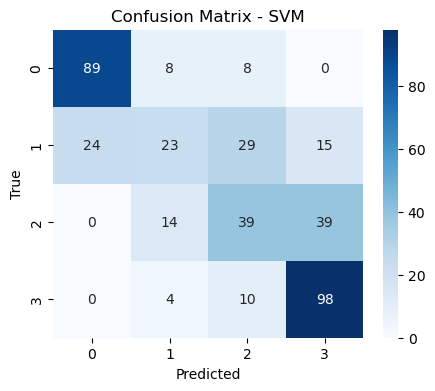

------------------------------------------------------------
Training Gradient Boosting ...
Gradient Boosting Accuracy: 0.9000
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       105
           1       0.85      0.92      0.88        91
           2       0.84      0.86      0.85        92
           3       0.94      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Gradient Boosting Accuracy: 0.9000
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       105
           1       0.85      0.92      0.88        91
           2       0.84      0.86      0.85        92
           3       0.94      0.89      0

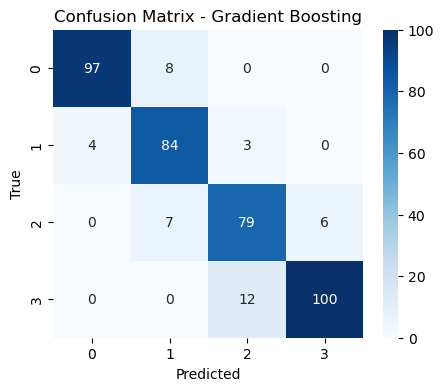

------------------------------------------------------------
Training LightGBM ...


In [ ]:
results = {}

for name, (model, params, Xtr, Xte) in models.items():
    print(f"Training {name} ...")
    grid = GridSearchCV(model, params, cv=3, scoring="accuracy", n_jobs=-1)
    grid.fit(Xtr, y_train)
    
    y_pred = grid.predict(Xte)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = (acc, grid.best_params_)
    
    print(f"{name} Accuracy: {acc:.4f}")
    print("Best Params:", grid.best_params_)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    print("-"*60)

# Model Comparison
This cell compares the performance of all trained models by visualizing their accuracy scores. It helps identify the best model for the dataset.

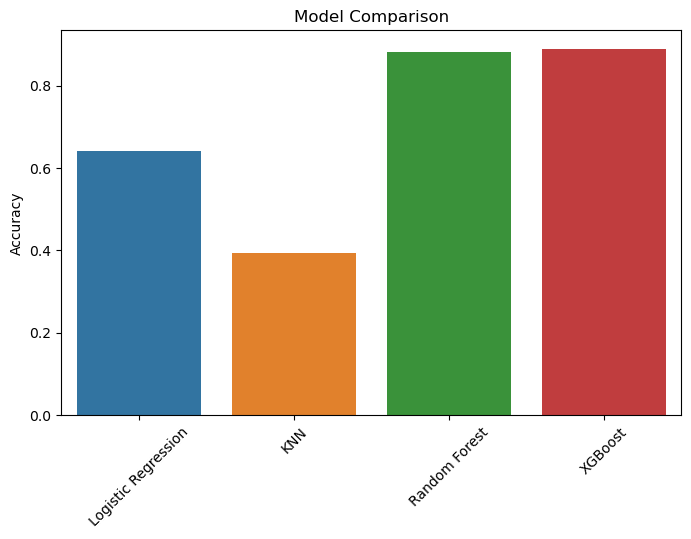

,Accuracy,Best Params
Logistic Regression,0.6425,"{'C': 1, 'solver': 'liblinear'}"
KNN,0.395,"{'n_neighbors': 3, 'weights': 'distance'}"
Random Forest,0.8825,"{'max_depth': None, 'min_samples_split': 2, 'n..."
XGBoost,0.89,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


In [ ]:
res_df = pd.DataFrame(results).T
res_df.columns = ["Accuracy", "Best Params"]

plt.figure(figsize=(8,5))
sns.barplot(x=res_df.index, y=res_df["Accuracy"])
plt.xticks(rotation=45)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()

res_df


# Best Model Selection and Saving
This cell identifies the best-performing model based on accuracy, retrains it on the entire training set, and saves it as a joblib file for future use.

In [ ]:
from joblib import dump

# למצוא את המודל עם ה-Accuracy הכי גבוה
best_model_name = res_df["Accuracy"].astype(float).idxmax()
best_model_accuracy = res_df.loc[best_model_name, "Accuracy"]

print(f"Best model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

best_model = models[best_model_name][0]
best_model.fit(X_train, y_train)

dump(best_model, "best_model.joblib")
print("Best model saved as 'best_model.joblib'")

Best model: XGBoost with Accuracy: 0.8900
Best model saved as 'best_model.joblib'


c:\ana\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:58:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
